In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scresonators.measurement.handy as hy

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'
meas = 'silta9a'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import yaml

with open('mini2.yml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

#data_pth = pth_base+folder+'Data/'+params['pth'][ind]+params['dir'][ind]
data_pth = os.path.join(pth_base,folder, 'Data', params['pth'][ind], params['dir'][ind])
#data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

0


['fit_results_freq_4089MHz.csv', 'fit_results_freq_5056MHz.csv', 'fit_results_freq_5454MHz.csv', 'fit_results_freq_6319MHz.csv', 'fit_results_freq_7724MHz.csv']


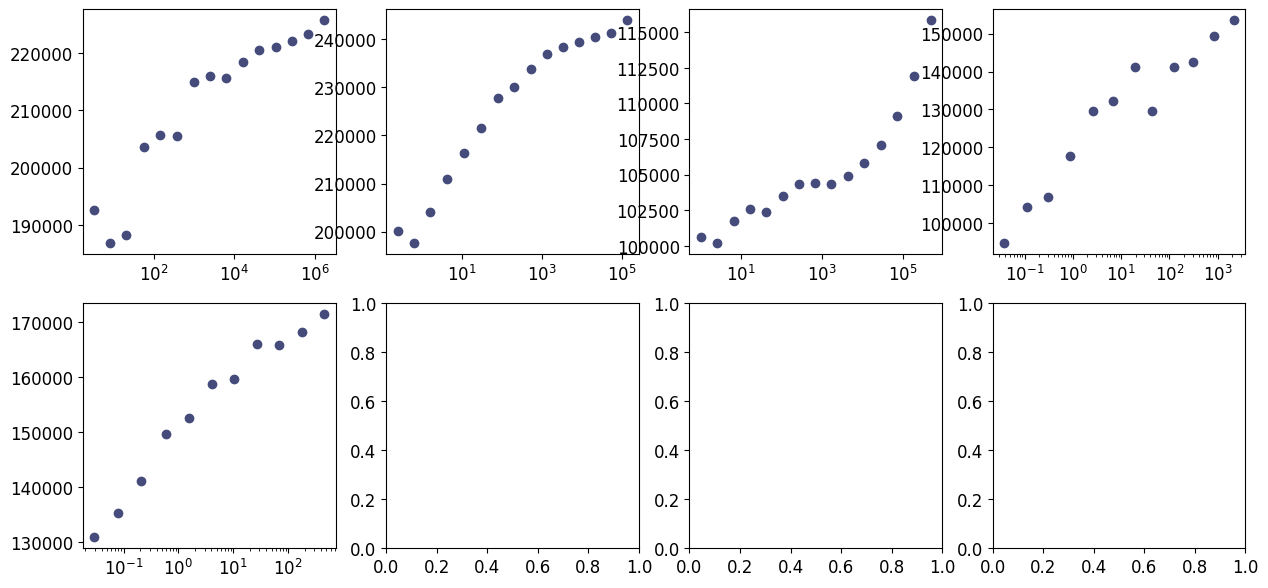

In [13]:
import os 
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
ord = [0, 1, 2, 3, 4]
csv_files_in_dir = [f for f in os.listdir(data_pth) if f.startswith('fit_results') and f.endswith('.csv')]
csv_files_in_dir.sort()
print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    try: 
        ax[ord[i]].semilogx(df['photon_number'], df['q_internal'],'o')
    except: 
        pass

df_full = df_full.sort_values(by='pitch')

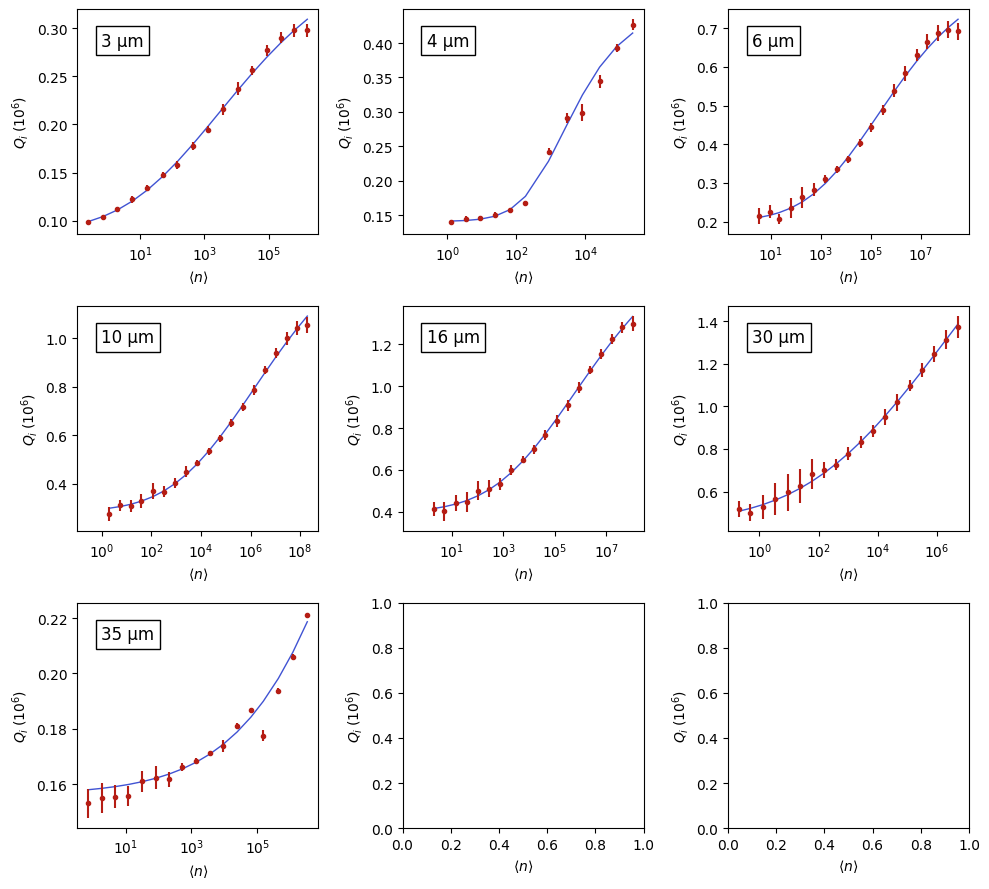

In [249]:
# for slab 
# max_photon = [2e8, 5e8, 7e8, 8e8, 2e9, 2e7]
# min_photon = [1, 1, 1, 1, 1, 1]


# for jpa 
max_photon = [2e7, 5e9, 1e10, 5e9, 5e9, 2e10, 2e10]
min_photon = [1, 1, 1, 1, 1, 1,100]

max_photon = [2e7, 5e5, 1e10, 5e9, 5e9, 2e10, 2e10]
min_photon = [0, 0, 0, 0, 0, 0, 0]

#min_photon = [300, 1, 1, 1, 240000, 1000]
#params, 
#cfg = ana_tls.fit_qi2(df_full, img_pth, name=img_name)
cfg = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon) 

/Users/sph/Documents/Git/scresonators/fit_resonator/../../scresonators/fit_resonator/ana_tls.py:482: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].set_ylabel("$Q_c \; (10^6)$")


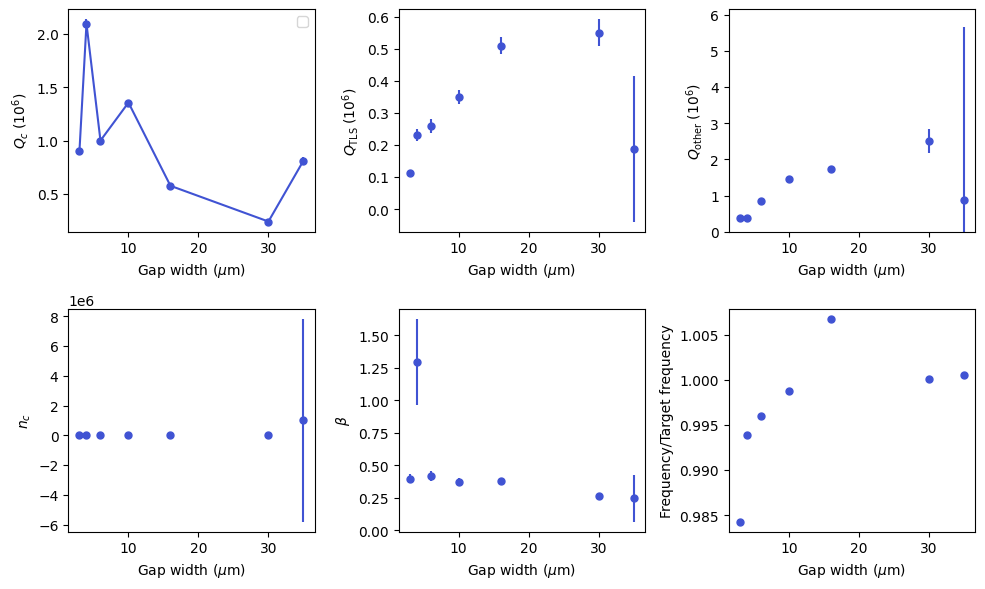

In [247]:
ana_tls.plot_res_pars([cfg], [''],img_pth, name=img_name)
hy.save_np(cfg, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')

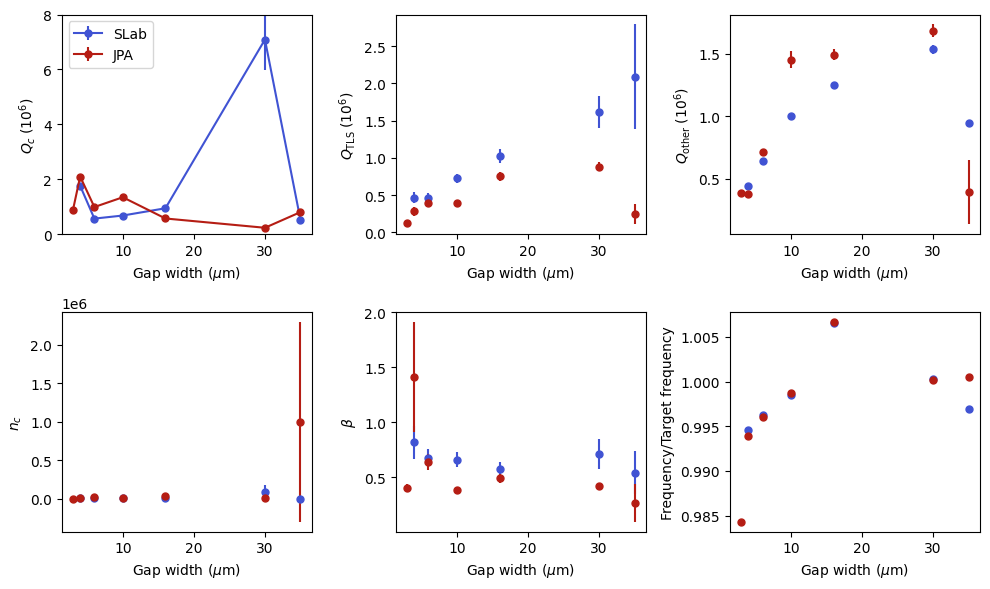

In [230]:
pnames = ['20250728-ResSilTa-Aggron-Slabsilta8_slab' ,'20250728-ResSilTa-Aggron-JPAsilta8_jpa']
labs = ['SLab', 'JPA'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ax=ana_tls.plot_res_pars(plist, labs,img_pth, name=pnames[0]+'_' +pnames[1])
#ResonatorPlotter.plot_res_pars(plist, labs,img_pth)

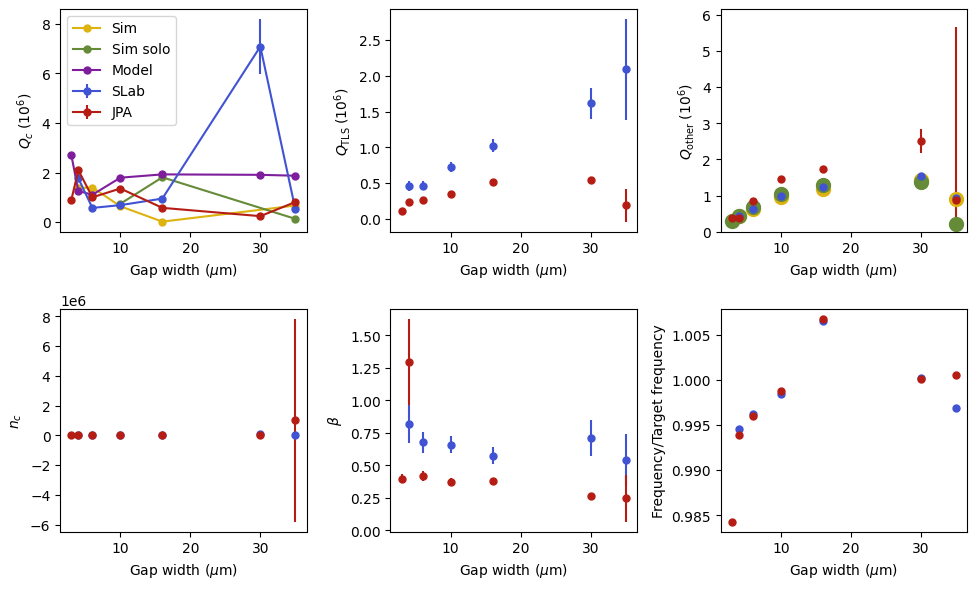

In [ ]:
pnames = ['20250728-ResSilTa-Aggron-Slabsilta8_slab' ,'20250728-ResSilTa-Aggron-JPAsilta8_jpa']
labs = ['SLab', 'JPA'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ax=ana_tls.plot_res_pars(plist, labs,img_pth, name=pnames[0]+'_' +pnames[1])

pitch = [35, 16, 10, 6, 4]
qc = [0.67, 0.02, 0.64, 1.398, 1.378]
ax[0].plot(pitch, qc, '.-', label='Sim')  
pitch2 = np.array([35, 16, 10])
qc2 = [0.133, 1.81, 0.7415]
ax[0].plot(pitch2, qc2, '.-', label='Sim solo')  
ax[0]
pitch = [35, 30, 16, 10, 6, 4, 3]
qcmod=np.array([1.87391594, 1.9094882 , 1.92735652, 1.79437465, 1.10543605,
       1.25610119, 2.69461627])

ax[0].plot(pitch, qcmod, '.-', label='Model')
ax[0].legend()  

ax[2].plot(plist[0]['pitch'], plist[0]['qi_hi']/1e6, 'o', label='JPA')
ax[2].plot(plist[1]['pitch'], plist[1]['qi_hi']/1e6, 'o', label='SLab')

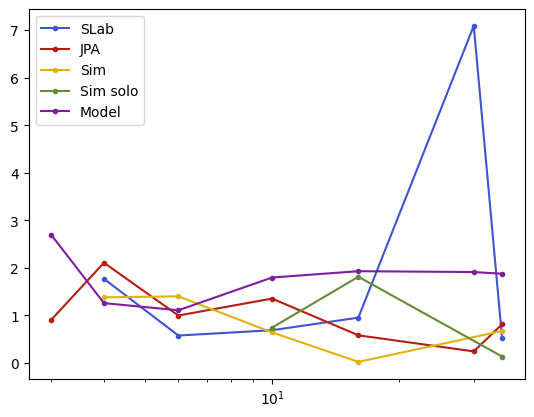

In [250]:
plt.figure()
plt.semilogx(plist[0]['pitch'], plist[0]['qc']/1e6, '.-', label='SLab')

plt.plot(plist[1]['pitch'], plist[1]['qc']/1e6, '.-', label='JPA')

qc_meas = (plist[0]['qc']+plist[1]['qc'][1:])/2

# plt.semilogx(plist[0]['pitch'], qc_meas/1e6, '.-', label='Average Meas')

pitch = [35, 16, 10, 6, 4]
qc = [0.67, 0.02, 0.64, 1.398, 1.378]
plt.plot(pitch, qc, '.-', label='Sim') 

pitch2 = np.array([35, 16, 10])
qc2 = [0.133, 1.81, 0.7415]
plt.plot(pitch2, qc2, '.-', label='Sim solo')  

pitch = [35, 30, 16, 10, 6, 4, 3]
qcmod=np.array([1.87391594, 1.9094882 , 1.92735652, 1.79437465, 1.10543605,
       1.25610119, 2.69461627])

plt.plot(pitch, qcmod, '.-', label='Model')
plt.legend()  

In [ ]:
print(plist[0]['qc']/1e6/qcmodflip[:-1])
print(plist[1]['qc']/1e6/qcmodflip)

print(np.mean(plist[0]['qc']/1e6/qcmodflip[:-1]))
np.mean(plist[1]['qc']/1e6/qcmodflip)

# just 10 and 16 are weird 


[0.64965207 0.45928547 0.62583691 0.53016749 3.62533384 0.27667894]
[0.33439615 1.68366972 0.90512814 0.7549229  0.29978911 0.12665082
 0.43366802]
1.0278257875105548


0.6483178387378353

In [184]:
print(np.mean(np.array([0.64965207, 0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.mean(np.array([0.33439615, 1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.508324176
0.7352623399999999


In [ ]:
print(np.std(np.array([0.64965207, 0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.std(np.array([0.33439615, 1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.134405548017024
0.4778436383475996


In [186]:
print(np.mean(np.array([0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.mean(np.array([1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

print(np.std(np.array([0.45928547, 0.62583691, 0.53016749, 0.27667894])))
print(np.std(np.array([1.68366972, 0.90512814, 0.7549229,  0.29978911, 0.43366802])))

0.4729922025
0.815435578
0.1278253590457393
0.4852164081136354
